Realizado por: Camilo Andres Cardenaz Saenz - Santiago Ramirez Salazar - Sergio Andres Mora Orrego






Punto 1. Generación de señales







In [ ]:
!pip install lcapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install texlive-latex-base

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-base is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [ ]:
!apt-get install texlive-latex-extra

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2019.202000218-1).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [ ]:
!apt-get update && apt-get install -y --no-install-recommends \
    texlive-fonts-recommended \
    texlive-latex-extra \
    texlive-fonts-extra \
    dvipng \
    lmodern

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Fetched 336 kB in 1s (374 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1

In [ ]:
!pip install control

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [ ]:
##Librerias para análisis estadístico y matemático
import matplotlib.pyplot as plt
from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier 
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns #Histogramas
from numpy import logspace
import sympy as sym

import math
%matplotlib inline
import scipy.stats
import warnings
warnings.filterwarnings("ignore", message="""Caught 'unbalanced parenthesis at position 119' compiling regex""", category=UserWarning )
from scipy.optimize import fmin
from mpl_toolkits.mplot3d import Axes3D
import pylab as pl
from scipy.special import factorial

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.base import BaseEstimator, TransformerMixin
from numpy.lib.shape_base import apply_over_axes

from scipy.stats import norm
from scipy.optimize import minimize

from sklearn.neighbors import KernelDensity

import os
import sys

# import pandas_datareader.data as web

warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
plt.style.use('seaborn-whitegrid')

from statsmodels.tsa import ar_model, arima_process, arima, arima_model
from statsmodels.tsa.ar_model import AutoReg

import control

from scipy import stats
from scipy import signal as sg
from scipy.optimize import fmin
import pylab as pl
from scipy.stats import gamma

<ipython-input-941-a835aa79d4c8>:41: UserWarning: DelftStack
  warnings.warn('DelftStack')
<ipython-input-941-a835aa79d4c8>:43: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
class LKhood():
  """
  Clase que se encarga de realizar la estimación por máxima verosimilitud.
  """
  def __init__(self, funcion_de_estimacion: np.array, plot=True, hist=True):
      self.funcion_de_estimacion = funcion_de_estimacion
      self.plot = plot
      self.hist = hist
      self.n = len(self.funcion_de_estimacion)

  def Gaussiana(self, lim_media: np.array, lim_varianza: np.array, intervalo: float = 0.05):
      """
      Función que realiza la estimación utilizando una distribución gaussiana.
      """
      media = np.arange(lim_media[0], lim_media[1], intervalo)
      varianza = np.arange(lim_varianza[0], lim_varianza[1], intervalo)
      media, varianza = np.meshgrid(media, varianza)
      log = -(self.n / 2 * np.log(2 * np.pi) + self.n / 2 * np.log(varianza) + (np.sum(
          np.square(self.funcion_de_estimacion)) - 2 * media * np.sum(
          self.funcion_de_estimacion) + self.n * media ** 2) / (2 * varianza))
      Ps_max = np.where(log == np.amax(log))
      media_estimada = media[Ps_max[0], Ps_max[1]]
      varianza_estimada = varianza[Ps_max[0], Ps_max[1]]

      if self.plot:
          fig = plt.figure()
          ax = fig.add_subplot(111, projection='3d')
          ax.plot_surface(media, varianza, log)
          plt.show()

      if self.hist:
          Nbins = int(1 + 3.322 * np.log2(self.n))
          plt.figure(figsize=(8, 8))
          plt.hist(self.funcion_de_estimacion, bins=Nbins, color="orange", label="Original")
          plt.hist(np.random.normal(media_estimada, np.sqrt(varianza_estimada), self.n), bins=Nbins, color="blue",
                    label="Estimation-Varianza {}-median {}".format(varianza_estimada, media_estimada))
          plt.legend()
          plt.title("Comparacion original y estimada")
          plt.show()

      return media_estimada, varianza_estimada

  def Laplace(self, median_limits, scale_limits, espace=0.01):
    def laplace_log_likelihood(params):
        mu = params[0]
        b = params[1]
        n = len(self.funcion_de_estimacion)
        log_likelihood = -(n * np.log(2 * b)) - (np.sum(np.abs(self.funcion_de_estimacion - mu)) / b)
        return -log_likelihood  # Negativo para maximizar en lugar de minimizar

    result = minimize(laplace_log_likelihood, [0, 1], method='Nelder-Mead')
    estimated_mu = result.x[0]
    estimated_b = result.x[1]

    # Cálculo de laplace_estimated_distribution
    laplace_estimated_distribution = np.random.laplace(estimated_mu, estimated_b, self.n)

    # Resto del código para visualización y comparación de resultados

    if self.hist:
        Nbins = int(1 + 3.322 * np.log2(self.n))
        plt.figure(figsize=(8, 8))
        # plt.hist(self.funcion_de_estimacion, bins=Nbins, color="orange", label="Original")
        plt.hist(laplace_estimated_distribution, bins=Nbins, color="blue",
                 label="-Scale {} \n-Loc {}".format(estimated_b, estimated_mu))
        plt.legend()
        # plt.title("Comparación original y estimada")
        plt.title("Estimación por MVE")

        plt.show()

    return estimated_mu, estimated_b, laplace_estimated_distribution

In [ ]:
class KDE():

   """ 
  class in charge of managing the estimation by the non-parametric kernel method

  PARAMETERS
  -------------------------------------------------------------------
  X_function{np.array}--array with the information of the function to which 
                        we need to find its respective distribution function
  H{float}-- bandwidth

  Returns
  -----------------------------------------------------------------------
  None

   """
   def __init__(self,X_function:np.array, H:float=0.5):
     self.X_function=X_function
     self.H=H

   def Gaussian(self):

      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE GAUSSIAN

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None

      """
      self.kernel="gaussian"
      self.__fit()
   def Tophat(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE Tophat

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="tophat"
      self.__fit()
   def epanechnikov(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EPANECHNIKOV

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="epanechnikov"
      self.__fit()
   def exponential(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE EXPONENTIAL

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="exponential"
      self.__fit()
   def linear(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE LINEAR

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="linear"
      self.__fit()
   def cosine(self):
      """
      FUNCTION THAT SELECT THE KERNEL FUNCTION LIKE COSINE

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernel="cosine"
      self.__fit()
   def __fit(self):
      """
      FUNCTION THAT MAKE THE KERNEL ESTIMATION WITH A FIT ASOCIATE TO THE TYPE OF 
      THE KERNEL FUNCTION {SELF.KERNEL} AND THE DATA{SELF.X_FUNCTION}

      PARAMETERS
      -------------------------
      None

      RETURNS
      ----------------------------------
      None
      
      """
      self.kernelDensity=KernelDensity(kernel=self.kernel,bandwidth=self.H).fit(self.X_function.reshape(-1,1))
   def plot(self,X_plot:np.array,figure_size:tuple=(11,6)):
     """
      FUNCTION THAT COMPARE WITH A PLOT THE KERNEL ESTIMATION WITH THE HISTOGRAM
      OF THE SIGNAL.

      PARAMETERS
      -------------------------
      X_plot{np.array}--ARRAY WITH THE X-AXIS DID IT WITH NP.ARANGE(X_MIN,X_MAX,ESPACE)
      FIGURE_SIZE{TUPLE}: WITH THE SIZE OF THE GRAPHICS.

      RETURNS
      ----------------------------------
      None
      
     """

     try:
      X_plot=X_plot[:,np.newaxis]
      log_dens=self.kernelDensity.score_samples(X_plot)
      fig,ax=plt.subplots(figsize=figure_size)
      ax.plot(
          X_plot[:,0],np.exp(log_dens),color="navy",label="Kernel"
      )
      
      ax.hist(self.X_function,density = True)
      plt.show()
     except AttributeError:
       print("YOU NEED TO DECIDE A TYPE OF KERNEL BEFORE....")
      

Punto 1. Generación de señales


Media del espectro de potencia: 514160.16440919024


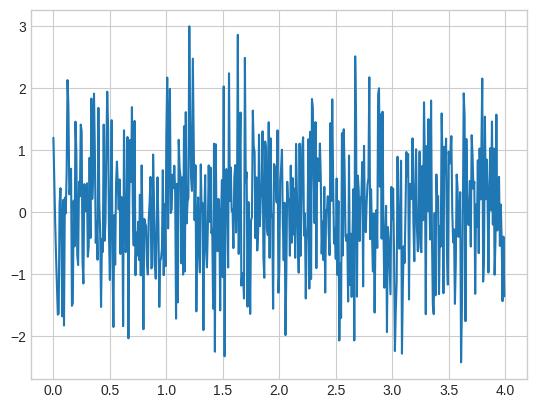

(array([ 4.,  3.,  5.,  6., 15., 15., 14., 17., 23., 33., 27., 41., 35.,
        28., 48., 30., 35., 25., 19., 23., 18., 15., 11.,  7.,  5.,  5.,
         0.,  3.,  0.,  2.]),
 array([-2.41577644, -2.23562956, -2.05548268, -1.8753358 , -1.69518892,
        -1.51504204, -1.33489517, -1.15474829, -0.97460141, -0.79445453,
        -0.61430765, -0.43416077, -0.25401389, -0.07386702,  0.10627986,
         0.28642674,  0.46657362,  0.6467205 ,  0.82686738,  1.00701425,
         1.18716113,  1.36730801,  1.54745489,  1.72760177,  1.90774865,
         2.08789553,  2.2680424 ,  2.44818928,  2.62833616,  2.80848304,
         2.98862992]),
 <BarContainer object of 30 artists>)

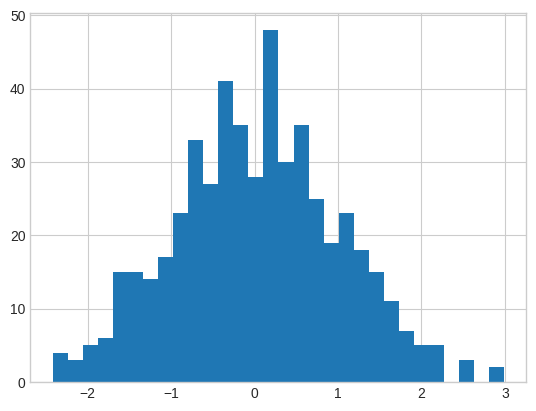

In [ ]:
"""
Laplace
"""
# Nsample=5000
# Fdisc=Nsample/4
# Tdisc=1/Fdisc
# t=np.arange(0,4,Tdisc)
# input_circuit = np.random.laplace(size=len(t), loc=0, scale=1)

# plt.plot(t,input_circuit)
# plt.xlabel("Time")
# plt.show()
# plt.hist(input_circuit, bins=30)
# plt.xlabel("Time")
# plt.show()

# loc, scale = stats.distributions.laplace.fit(input_circuit)
# print(loc)
# print(scale)

"""
Gauss
"""
# t=np.linspace(0,2,4096)
# input_circuit = np.random.normal(0.1,1.1,4096)
# plt.plot(t, input_circuit)
# plt.show()
# plt.hist(input_circuit)

"""
RBG
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del ruido blanco gaussiano
mean = 0  # Media
std = 1  # Desviación estándar

# Generar señal de ruido blanco gaussiano
Nsample = 512  # Número de puntos de la señal
input_circuit = norm.rvs(loc=mean, scale=std, size=Nsample)

Fdisc=Nsample/4
Tdisc=1/Fdisc
t=np.arange(0,4,Tdisc)

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(input_circuit, input_circuit, mode='full')
    
    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Obtener las frecuencias correspondientes
frequencies = np.fft.fftfreq(len(autocorrelation_avg))

# Calcular el espectro de potencia
power_spectrum = np.abs(np.fft.fft(autocorrelation_avg))**2

# Calcular la media del espectro de potencia
mean_power = np.mean(power_spectrum)

# Imprimir la media del espectro de potencia
print("Media del espectro de potencia:", mean_power)

plt.plot(t, input_circuit)
plt.show()
plt.hist(input_circuit, bins=30)

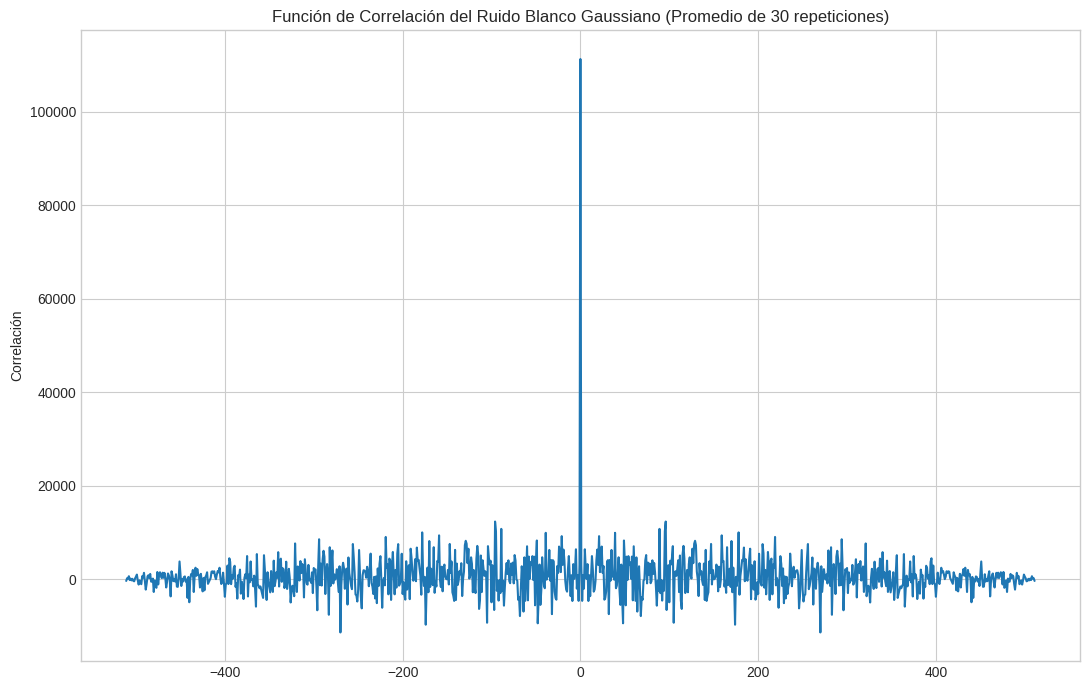

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del ruido blanco gaussiano
mean = 0  # Media
std = 15  # Desviación estándar

# Generar señal de ruido blanco gaussiano
#Nsample = 64  # Número de puntos de la señal
input_circuit = norm.rvs(loc=mean, scale=std, size=Nsample)

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(input_circuit, input_circuit, mode='full')
    
    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Crear un array con los desplazamientos temporales
tau = np.arange(-Nsample + 1, Nsample)

# Graficar la función de correlación
plt.figure(figsize=(11, 7))
plt.plot(tau, autocorrelation_avg)
plt.ylabel('Correlación')
plt.title('Función de Correlación del Ruido Blanco Gaussiano (Promedio de 30 repeticiones)')
plt.tight_layout()
plt.show()


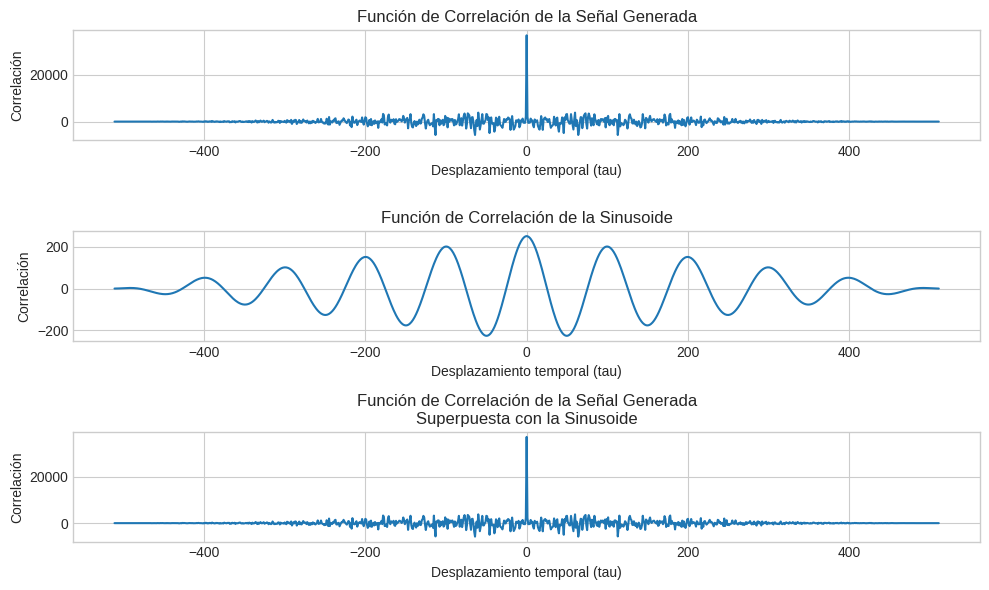

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del ruido blanco gaussiano
mean = 0  # Media
std = 15  # Desviación estándar

# Generar señal de ruido blanco gaussiano
input_circuit = norm.rvs(loc=mean, scale=std, size=Nsample)

# Generar señal sinusoidal
fs = 1000  # Frecuencia de muestreo
f = 10  # Frecuencia de la sinusoide
t = np.arange(Nsample) / fs
sinusoid = np.sin(2 * np.pi * f * t)

# Superponer la sinusoide a la señal generada
input_circuit_with_sinusoid = input_circuit + sinusoid

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Aplicar ventana de Hamming a las señales
    input_circuit_windowed = input_circuit * np.hamming(Nsample)
    input_circuit_with_sinusoid_windowed = input_circuit_with_sinusoid * np.hamming(Nsample)

    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(input_circuit_windowed, input_circuit_windowed, mode='full')

    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Crear un array con los desplazamientos temporales
tau = np.arange(-Nsample + 1, Nsample)

# Calcular la función de correlación de la sinusoide
autocorrelation_sinusoid = np.correlate(sinusoid, sinusoid, mode='full')

# Calcular la función de correlación de la señal generada superpuesta con la sinusoide
autocorrelation_with_sinusoid = np.correlate(input_circuit_with_sinusoid_windowed, input_circuit_with_sinusoid_windowed, mode='full')

# Graficar la función de correlación de la señal generada
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(tau, autocorrelation_avg)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada')

# Graficar la función de correlación de la sinusoide
plt.subplot(3, 1, 2)
plt.plot(tau, autocorrelation_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Sinusoide')

# Graficar la función de correlación de la señal generada superpuesta con la sinusoide
plt.subplot(3, 1, 3)
plt.plot(tau, autocorrelation_with_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada\nSuperpuesta con la Sinusoide')

plt.tight_layout()
plt.show()


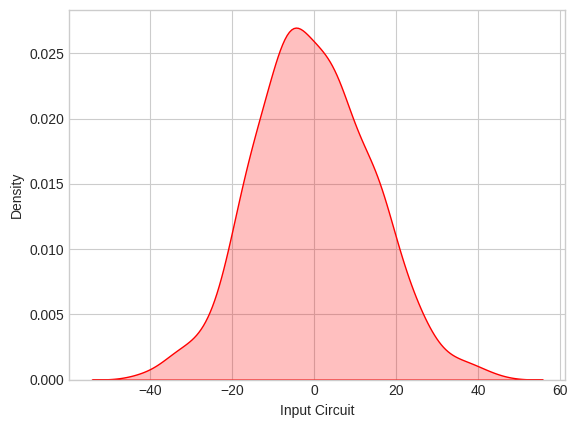

In [ ]:
KERNELInt = KernelDensity(bandwidth=1.0, kernel='gaussian')
vect_t = np.linspace(-10, 10, Nsample)
KERNELInt.fit(input_circuit[:, None])

prob_lg = KERNELInt.score_samples(vect_t[:, None])

sns.kdeplot(input_circuit, fill=True, color='red')
plt.xlabel('Input Circuit')

plt.show()

Punto 2: Estimación de parámetros

In [ ]:
loc, scale = scipy.stats.distributions.laplace.fit(input_circuit)

print(f'Scale: {scale}\nLoc: {loc}')

Scale: 11.41743988797502
Loc: -0.9227618797004435


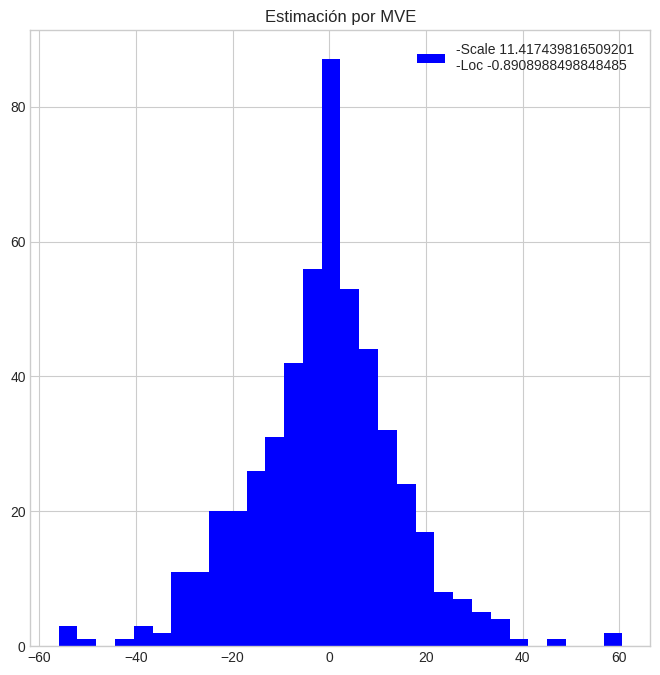

'\nGauss\n'

In [ ]:
"""
Laplace
"""
N = Nsample
μ = 0.1
V2 = 1.1
LKhood1 = LKhood(input_circuit)
Values_median = np.array([μ - 2 * V2, μ + 2 * V2])
Values_scale = np.array([V2 / 2, 3 / 2 * V2])
espace = 0.01
median_estimated, scale_estimated, laplace_estimated = LKhood1.Laplace(Values_median, Values_scale, espace)


"""
Gauss
"""
# N =  4096 # // numero de muestras 

# #   parametros vector \theta=\mu, \sigma^2
# μ  = 0.1
# V2 = 1.1
# LKhood1=LKhood(input_circuit) ## TENGO MIS DATOS GUARDADOS 
# Values_mean = np.array([μ-2*V2, μ+2*V2]) ##VECTOR DE MEDIAS 
# Values_var = np.array([V2/2, 3/2*V2]) # VECTOR DE VARIANZAS
# espace=0.01
# media_estimada,varianza_estimada,gaussiana_estimada=LKhood1.Gaussiana(Values_mean,Values_var,espace)

Punto 3: Cálculo de Función de transferencia: Filtro pasa bandas



In [ ]:
from lcapy import Circuit, j, omega, s
ctt=Circuit(
"""
Vi 1 0 step;down
R1 1 2; right, size=1.5
L1 2 3; right, size=1.5
C1 3 0_3; down
W 0 0_3; right
"""
)

# ctt = Circuit(
# """
# Vi 1 0_1 step;up
# C1 1 2; right, size=1.5
# R1 2 0; down, size=1.5
# R2 2 3; right, size=1.5
# C2 3 0_3;down, size=1.5
# W 0_1 0; right
# W 0 0_3;right""")

##### ctt = Circuit("""
# Vi 1 0_1 step;down
# R1 1 2; right, size=1.5
# C1 2 3; down,v=(V_o)

# W 0_1 0;right
# W 0 3;right
# """
# )

In [ ]:
# ctt.draw()

In [ ]:
H=(ctt.C1.V(s)/ctt.Vi.V(s)).simplify()
H

          1           
──────────────────────
       2              
C₁⋅L₁⋅s  + C₁⋅R₁⋅s + 1

In [ ]:
C1=100e-9
R1=1000
L1=100e-3

Coeficientes_num=[1]
Coeficientes_dem=[C1*L1,C1*R1,1]


In [ ]:
H_valores=H.subs('C1',C1).subs('R1',R1).subs('L1',L1)
lti_system = lti(Coeficientes_num, Coeficientes_dem) 
t,h=lti_system.impulse(N=Nsample)

/usr/local/lib/python3.10/dist-packages/control/freqplot.py:187: FutureWarning: 'Plot' keyword is deprecated in bode_plot; use 'plot'
  warnings.warn("'Plot' keyword is deprecated in bode_plot; use 'plot'",


Error in callback <function _draw_all_if_interactive at 0x7f270f9d17e0> (for post_execute):


KeyboardInterrupt: ignored

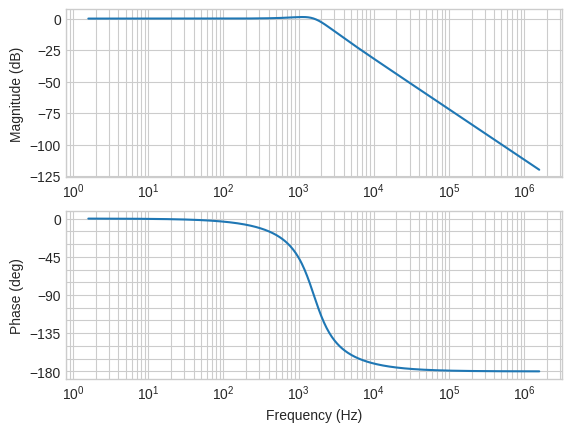

In [ ]:
W = np.logspace(1, 7, Nsample)
H = control.TransferFunction(Coeficientes_num, Coeficientes_dem)
X = control.bode(H, W, dB=True, Hz=True, deg=True, Plot=True)

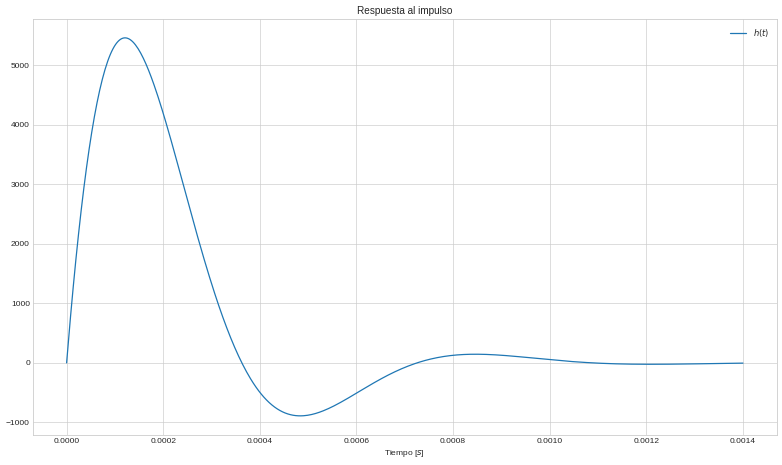

In [ ]:
plt.figure(figsize=(16,9), dpi=60)
plt.plot(t,h, label='$h(t)$')
plt.grid(True)
plt.legend()
plt.title('Respuesta al impulso')
plt.xlabel("Tiempo [$s$]")
# plt.xlim(-0.0001, 0.01)
plt.show()

In [ ]:
_,Output_Circuit,_=lti_system.output(input_circuit,t) ##SALIDA DEL CIRCUITO.

In [ ]:
plt.plot(t,input_circuit)
plt.xlabel("Input")

plt.plot(t,Output_Circuit)
plt.xlabel("Output")
plt.show()

4 Punto: Estimación de parámetros de salida

In [ ]:
KERNELOut = KernelDensity(bandwidth=1.0, kernel='gaussian')
vect_t = np.linspace(-10, 10, Nsample)
KERNELOut.fit(Output_Circuit[:, None])

prob_lg = KERNELOut.score_samples(vect_t[:, None])

sns.kdeplot(Output_Circuit, fill=True, color='red')
plt.xlabel('Output Circuit')

plt.show()

In [ ]:
"""
LAPLACE
"""
N = Nsample
μ = 0.1
V2 = 1.1
LKhood1 = LKhood(Output_Circuit)
Values_median = np.array([μ - 2 * V2, μ + 2 * V2])
Values_scale = np.array([V2 / 2, 3 / 2 * V2])
espace = 0.01
median_estimated, scale_estimated, laplace_estimated = LKhood1.Laplace(Values_median, Values_scale, espace)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros del ruido blanco gaussiano
mean = 0  # Media
std = 1  # Desviación estándar

# Generar señal de ruido blanco gaussiano
#Nsample = 64  # Número de puntos de la señal
input_circuit = norm.rvs(loc=mean, scale=std, size=Nsample)

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(Output_Circuit, Output_Circuit, mode='full')
    
    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Crear un array con los desplazamientos temporales
tau = np.arange(-Nsample + 1, Nsample)

# Graficar la función de correlación
plt.figure(figsize=(11, 7))
plt.plot(tau, autocorrelation_avg)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación del Ruido Blanco Gaussiano (Promedio de 30 repeticiones)')

plt.tight_layout()
plt.show()


In [ ]:
# Generar señal sinusoidal
fs = 1000  # Frecuencia de muestreo
f = 10  # Frecuencia de la sinusoide
t = np.arange(Nsample) / fs
sinusoid = np.sin(2 * np.pi * f * t)

# Superponer la sinusoide a la señal generada
Output_Circuit_with_sinusoid = Output_Circuit + sinusoid

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Aplicar ventana de Hamming a las señales
    Output_Circuit_windowed = Output_Circuit * np.hamming(Nsample)
    Output_Circuit_with_sinusoid_windowed = Output_Circuit_with_sinusoid * np.hamming(Nsample)

    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(Output_Circuit_windowed, Output_Circuit_windowed, mode='full')

    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Crear un array con los desplazamientos temporales
tau = np.arange(-Nsample + 1, Nsample)

# Calcular la función de correlación de la sinusoide
autocorrelation_sinusoid = np.correlate(sinusoid, sinusoid, mode='full')

# Calcular la función de correlación de la señal generada superpuesta con la sinusoide
autocorrelation_with_sinusoid = np.correlate(Output_Circuit_with_sinusoid_windowed, Output_Circuit_with_sinusoid_windowed, mode='full')

# Graficar la función de correlación de la señal generada
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(tau, autocorrelation_avg)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada')

# Graficar la función de correlación de la sinusoide
plt.subplot(3, 1, 2)
plt.plot(tau, autocorrelation_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Sinusoide')

# Graficar la función de correlación de la señal generada superpuesta con la sinusoide
plt.subplot(3, 1, 3)
plt.plot(tau, autocorrelation_with_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada\nSuperpuesta con la Sinusoide')

plt.tight_layout()
plt.show()


In [ ]:
# Generar señal sinusoidal
fs = 1000  # Frecuencia de muestreo
f = 10  # Frecuencia de la sinusoide
t = np.arange(Nsample) / fs
sinusoid = np.sin(2 * np.pi * f * t)

# Superponer la sinusoide a la señal generada
Output_Circuit_with_sinusoid = Output_Circuit + sinusoid

# Aplicar ventana de Hamming a la señal generada superpuesta con la sinusoide
Output_Circuit_with_sinusoid_windowed = Output_Circuit_with_sinusoid * np.hamming(Nsample)

# Realizar zero-padding en la señal sinusoidal
sinusoid_padded = np.pad(sinusoid, (0, Nsample - len(sinusoid)), mode='constant')

# Repetir el cálculo de la correlación varias veces
num_reps = 30  # Número de repeticiones
autocorrelation_sum = np.zeros(2 * Nsample - 1)  # Suma acumulada de correlaciones

for _ in range(num_reps):
    # Aplicar ventana de Hamming a la señal generada
    Output_Circuit_windowed = Output_Circuit * np.hamming(Nsample)

    # Calcular la correlación para cada repetición
    autocorrelation = np.correlate(Output_Circuit_windowed, Output_Circuit_windowed, mode='full')

    # Sumar las correlaciones obtenidas
    autocorrelation_sum += autocorrelation

# Calcular el promedio de las correlaciones
autocorrelation_avg = autocorrelation_sum / num_reps

# Aplicar ventana de Hamming a la función de correlación promedio
autocorrelation_avg_windowed = autocorrelation_avg * np.hamming(len(autocorrelation_avg))

# Crear un array con los desplazamientos temporales
tau = np.arange(-Nsample + 1, Nsample)

# Calcular la función de correlación de la sinusoide
autocorrelation_sinusoid = np.correlate(sinusoid_padded, sinusoid_padded, mode='full')

# Calcular la función de correlación de la señal generada superpuesta con la sinusoide
autocorrelation_with_sinusoid = np.correlate(Output_Circuit_with_sinusoid_windowed, Output_Circuit_with_sinusoid_windowed, mode='full')

# Graficar la función de correlación de la señal generada
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(tau, autocorrelation_avg_windowed)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada')

# Graficar la función de correlación de la sinusoide
plt.subplot(3, 1, 2)
plt.plot(tau, autocorrelation_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Sinusoide')

# Graficar la función de correlación de la señal generada superpuesta con la sinusoide
plt.subplot(3, 1, 3)
plt.plot(tau, autocorrelation_with_sinusoid)
plt.xlabel('Desplazamiento temporal (tau)')
plt.ylabel('Correlación')
plt.title('Función de Correlación de la Señal Generada\nSuperpuesta con la Sinusoide')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Graficar el espectro de potencia
plt.subplot(2, 1, 2)
plt.psd(input_circuit, label='Input Circuit')
plt.xlabel('Frecuencia')
plt.title('Espectro de potencia Ruido Blanco Gaussiano')
plt.tight_layout()

# Graficar el espectro de potencia
plt.subplot(2, 1, 2)
plt.psd(Output_Circuit, label='Output Circuit')
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.tight_layout()

# Agregar una leyenda
plt.legend()

plt.show()
